|First Name     |Last Name    |MtkNr.      |Due Date  |
|:-------------:|:-----------:|:----------:|:--------:|
| Write Here    | Write Here  |12345678     | 11.11.2024, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 1 – Image Processing Basics </h2>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 10-08-2024

<b>This file is part of the "Computer Vision Course 2024W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Low-pass-filtering"><li style="font-size:large;font-weight:bold">Low-pass filtering</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Apply-low-pass-filtering-in-the-spatial-domain"><li style="font-size:medium">Apply low-pass filtering in the spatial domain</li></a>
        <a style="color:rgb(150,100,10)" href="#Apply-low-pass-filtering-in-the-frequency-domain"><li style="font-size:medium">Apply low-pass filtering in the frequency domain</li></a>
    </ol>
    <a style="color:rgb(150,100,10)" href="#High-pass-filtering"><li style="font-size:large;font-weight:bold">High-pass filtering</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Apply-high-pass-filter-using-Laplacian"><li style="font-size:medium">Apply a high-pass filter using the Laplacian operator</li></a>
        <a style="color:rgb(150,100,10)" href="#Apply-high-pass-filter-using-image-subtraction"><li style="font-size:medium">Apply a high-pass filter using image subtraction</li></a>
    </ol>
    <a style="color:rgb(150,100,10)" href="#Deconvolution"><li style="font-size:large;font-weight:bold">Deconvolution</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Apply-deconvolution-as-division-in-frequency-domain"><li style="font-size:medium">Apply deconvolution by performing division in the frequency domain</li></a>
        <a style="color:rgb(150,100,10)" href="#Apply-deconvolution-with-Richardson-Lucy"><li style="font-size:medium">Apply deconvolution using the Richardson-Lucy algorithm</li></a>
    </ol>
</ol>


<h1 style="color:rgb(255,0,0)">Important Note</h1>
<b>In this assignment, you can use the default parameters in any built-in function unless specified otherwise</b>.

<b>All cells must be evaluated, and any unevaluated cell may lead to a loss of points, regardless of the correctness of the code.</b>

In [2]:
# Import all packages needed in this notebook.
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from skimage import restoration
import os

if not os.path.exists('resources'): raise TypeError("Please create the resources folder and include all required files")

<a name="Low-pass-filtering"></a><h2> Low-pass filtering</h2>
In this asignment, we focus on one image, which is <i><b>zebras</b><i>, provided in the <i><b>resources</b><i> folder. We will now read the <i><b>zebras</b><i> image and then convert it to a grayscale image using the provided function <i><b>read_convert_Img</b><i>.

In [3]:
def read_convert_Img(input_img):
    if type(input_img) != str:
        raise ValueError("input must be string)")
    img_Orig = cv.imread(input_img)
    if img_Orig.ndim != 3:
        raise ValueError("input image must have 3 channels)")
    img_Gray = np.mean(img_Orig, axis=2)
    return img_Gray

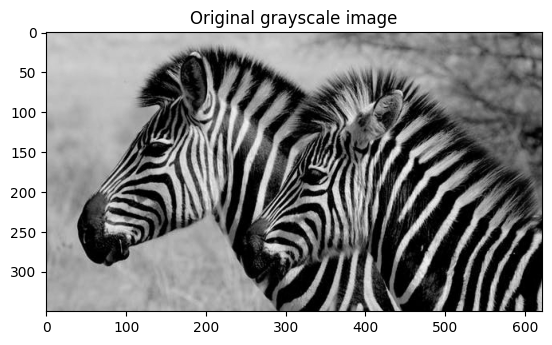

In [4]:
img_Gray_Orig = read_convert_Img("resources/zebras.jpg")/255.0

plt.imshow(img_Gray_Orig, cmap='gray')
plt.title('Original grayscale image')
plt.show()

<a name="Apply-low-pass-filtering-in-the-spatial-domain"></a><h3>Apply low-pass filtering in the spatial domain</h3>

<b>Exercise 1.1. [8 Points]</b>

<b>Goal:</b> After reading the input image, we will define a Gaussian low-pass filter. Our goal is to filter out the high-frequency components. Therefore, we will apply the convolution operation between the input image and the defined Gaussian low-pass filter in the <i><b>spatial domain</b></i>. To clearly observe the effect of the low-pass filter, we will apply the convolution operation <i><b>sequentially several times</b></i>.

<b>Task</b>
<ul>
<li>Define the following Gaussian filter, as shown in the formula below, in a <i><b>NumPy</b><i> array.</li>
<li>Apply this filter on the grayscale <i><b>zebras</b><i> image from above to compute the convolution operation. <b>Repeat this operation <i>5</i> times sequentially, using the output from each step as the input for the next convolution</b> while keeping the kernel the same</b>.</li>   
<li>Display both images: the original image, and the final resulting image after running all the convolution steps.</li>
</ul>
<p>
        \begin{equation}h_1 = \left(
            \begin{array}{rrr}
                1/16 & 1/8 & 1/16 \\
                1/8 & 1/4 & 1/8 \\
                1/16 & 1/8 & 1/16
            \end{array}\right)
        \end{equation}
</p>
        
<b>Hint</b>
<ul>
<li>Use the function <i><b>convolve</b><i> from <i><b>scipy.ndimage</b><i> library to compute the convolution operation.</li>
<li>You can use the <i><b>constant</b><i> mode for the convolution.</li>
</ul>

In [ ]:
# The code goes here

weights = np.ones_like(img_Gray_Orig)

print(weights.shape)
print(img_Gray_Orig.shape)

low_pass = convolve(img_Gray_Orig, weights=np.ones_like(img_Gray_Orig), mode='constant', cval=3.0)

<a name="Apply-low-pass-filtering-in-the-frequency-domain"></a><h3>Apply low-pass filtering in the frequency domain</h3>

<b>Exercise 1.2. [5 Points]</b>

<b>Goal:</b> After computing the filtered image in the spatial domain, let's compute the filtered image in the frequency domain.

<b>Task</b>
<ul>
<li>Utilize the Fourier transform to convert the original input grayscale <i><b>zebras</b><i> image from the spatial domain to the frequency domain.</li>
<li>Shift (centre) all frequency components around zero.</li>
<li>Create a Gaussian filter in the frequency domain with a cutoff frequency of <b>40</b>.</li>
</ul>

<b>Hint</b>
<ul>
<li>Use the functions <i><b>fft2</b><i> and <i><b>fftshift</b><i> from the NumPy library to compute the frequency components and center all frequency components around zero, respectively.</li>
<li>Use the function <i><b>create_Gaussian</b><i> to create the Gaussian filter in the frequency domain.</li>
<li>The shape of the <i><b>created Gaussian filter</b><i> should be the same as the shape of the grayscale image <i>zebras<i>.</li>
</ul>

In [ ]:
def create_Gaussian(h :int, w: int, cutoff : int ):
    H = np.zeros((h,w), dtype=np.float32)
    for u in range(h):
        for v in range(w):
            D = np.sqrt((u-h/2)**2 + (v-w/2)**2)
            H[u,v] = np.exp(-D**2/(2*cutoff*cutoff))
    return H

In [ ]:
# The code goes here


<b>Exercise 1.3. [5 Points]</b>

<b>Goal:</b > Our goal is to compute the filtered image by multiplying the spectrum of the input image with the spectrum of the Gaussian filter we created.

<b>Task</b>
<ul>
<li>Compute the multiplication between the spectrum of <i><b>zebras</b><i> image and the spectrum of the Gaussian filter you created.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 1.4. [6 Points]</b>

<b>Goal:</b> In this exercise, we aim to demonstrate the effect of low-pass filtering in the frequency domain by presenting all relevant results.

<b>Task</b>
<ul>
<li>Display the spectrum of the <i>(zebras)<i> image <b>before centering the components at zero</b>.</li>
<li>Display the spectrum of the <i>(zebras)<i> image <b>after centering the components at zero</b>.</li>
<li>Display the spectrum of the created Gaussian filter.</li>
<li>Display the result of the multiplication from <b>Exercise 1.3</b>.</li>
<li><span style="color:red">To draw the spectrum, you need to calculate the absolute value, followed by the <b>natural logarithm</b></span>.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 1.5. [5 Points]</b>

<b>Goal:</b> We need to display the filtered image in the spatial domain. Therefore, let's convert the spectrum back to the spatial domain.

<b>Task</b>
<ul>
<li>Compute the inverse Fourier transformation of <i><b>Exercise 1.3.</b><i> to transform the spectrum to the spatial domain.</li>
<li>Display the resulting image.</li>
</ul>

<b>Hint</b>
<ul>
<li>Use the function <i><b>ifftshift</b><i> to move all values back to their original locations.</li>
<li>Use the function <i><b>ifft2</b><i> to compute the spatial components from the spectrum.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 1.6. [5 Points]</b>

<b>Goal:</b> Now, let's adjust the cutoff frequency by selecting a smaller value.

<b>Task</b>
<ul>
<li>Repeat  <b>Exercises 1.2, 1.3, 1.4, and 1.5</b> with a cutoff frequency of <b>10</b>.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 1.7. [3 Points]</b>

<b>Goal:</b> Here, let's write our observation regarding the differences between cutoff frequency values.

<b>Question</b>
<ul>
<li>Briefly, in 2 lines, explain the difference between the results at cutoff frequencies <b>10</b>, and <b>40</b>.</li>
</ul>

The explanation goes here:


<b>Exercise 1.8. [3 Points]</b>

<b>Question</b>
<ul>
<li>What are the potential advantages of performing convolution in the frequency domain (i.e., multiplication) compared to convolution in the spatial domain (i.e., filtering)?</li>
</ul>

The explanation goes here:


<a name="High-pass-filtering"></a><h2>High-pass filtering</h2>

<a name="Apply-high-pass-filter-using-Laplacian"></a><h3>Apply a high-pass filter using the Laplacian operator</h3>

<b>Exercise 2.1. [10 Points]</b>

<b>Goal:</b> Instead of extracting low-frequency components with a low-pass filter, we will define a high-pass Laplacian filter and apply it using convolution in the spatial domain.

<b>Task</b>
<ul>
<li>Define the following $3 \times 3$ Laplacian filter, as shown in the formula below, in a <i><b>NumPy</b><i> array.</li>
<li>Apply this filter to the grayscale <i><b>zebras</b></i> image from above using convolution in the spatial domain.</li>
<li>Display both images: the original image, and the resulting image after the convolution step.</li>
</ul>
<p>
        \begin{equation}h_2 = \left(
            \begin{array}{rrr}
                0 & -1 & 0 \\
                -1 & 4 & -1 \\
                0 & -1 & 0
            \end{array}\right)
        \end{equation}
</p>

<b>Hint</b>
<ul>
<li>Use the function <i><b>convolve</b><i> from the <i><b>scipy.ndimage</b><i> library to perform the convolution operation.</li>
</ul>

In [ ]:
# The code goes here


<a name="Apply-high-pass-filter-using-image-subtraction"></a><h3>Apply a high-pass filter using image subtraction</h3>

<b>Exercise 2.2. [10 Points]</b>

<b>Goal:</b> Let's extract the high-frequency components by subtracting the Gaussian-filtered image from the original input image.

<b>Task</b>
<ul>
<li>Subtract the result of the Gaussian-filtered image in <b>Exercise 1.1</b> from the original input grayscale <i><b>zebras</b></i> image.</li>
<li>Display the result of this subtraction.</li>
</ul>

<b>Hint</b>
<ul>
<li>You can use the final result from <b>Exercise 1.1</b> after the five convolution iterations.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 2.3. [7 Points]</b>

<b>Goal:</b> Let's add the high-frequency components back to the Gaussian-filtered image from <b>Exercise 2.2</b>.

<b>Task</b>
<ul>
<li>Perform an additional operation between the result of <b>Exercise 2.2 (Subtracted image)</b> and the Gaussian-filtered image from <b>Exercise 1.1</b>.</li>
<li>Display the result of this operation.</li>
</ul>

<b>Hint</b>
<ul>
<li>You can use the final result from <b>Exercise 1.1</b> after five convolution iterations as well.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 2.4. [3 Points]</b>

<b>Question</b>
<ul>
<li>What do the results of <i><b>Exercise 2.1</b></i> and <i><b>Exercise 2.2</b></i> have in common in principle?</li>
</ul>

The explanation goes here:


<a name="Deconvolution"></a><h2> Deconvolution</h2>

<a name="Apply-deconvolution-as-division-in-frequency-domain"></a><h3>Apply deconvolution by performing division in the frequency domain</h3>

<b>Exercise 3.1. [12 Points]</b>

<b>Goal:</b> The goal here is to recover the original input <i><b>zebras</b><i> image by implementing deconvolution in the frequency domain using division instead of multiplication.

<b>Task</b>
<ul>
<li>Use the result from <b>Exercise 1.5</b> by converting the image from the spatial domain to the frequency domain. Also, you need to shift the frequency components around the zero value.</li>
<li>Then, divide this spectrum by the spectrum of the Gaussian filter created in <b>Exercise 1.2</b> with a cutoff frequency of <i><b>40</b><i>. </li>
<li>After the division, compute the inverse Fourier transform of this result to convert from the frequency domain back to the spatial domain.</li>
<li>Display the resulting image.</li>
</ul>
<b>Hint</b>
<ul>
<li>Before computing the inverse Fourier transform, Use the inverse Fourier shift function <i><b>ifftshift</b><i> from the <i><b>NumPy</b><i> library to move all components back to their original locations.</li>
</ul>

In [ ]:
# The code goes here


<b>Exercise 3.2. [3 Points]</b>

<b>Question</b>
<ul>
<li>How can you explain the appearance of the artifacts?</li>
</ul>

The explanation goes here:


<a name="Apply-deconvolution-with-Richardson-Lucy"></a><h3>Apply deconvolution using the Richardson-Lucy algorithm</h3>

<b>Exercise 3.3. [15 Points]</b>

<b>Goal:</b> Let's apply deconvolution using an optimization method instead of division in the frequency domain. Please note that there are several optimization methods, but in this assignment, we will utilize the Richardson-Lucy optimization method.

<b>Task</b>
<ul>
<li>Apply the Richardson-Lucy optimization method to perform the deconvolution step.</li>
<li><b>Repeat this operation 5 times sequentially as well, using the output from each step as the input for the next input of the Richardson-Lucy optimization method while keeping the kernel the same</b>.</li>
<li>Display only the corresponding final result after all runs.</li>
</ul>
<b>Hint</b>
<ul>
<li>Use the function <i><b>richardson_lucy</b><i> from the <i><b>skimage.restoration</b><i> library.</li>
<li>Use the Gaussian kernel defined in <i><b>Exercise 1.1</b><i>.</li>
<li>Use the output image from <i><b>Exercise 1.1</b></i> as the input image for the first time of the Richardson-Lucy optimization method.</li>
</ul>

In [ ]:
# The code goes here
